In [95]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

In [96]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [97]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

In [98]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                 6365                   Method:                            REML      
No. Groups:                       19                     Scale:                             0.3518    
Min. group size:                  329                    Log-Likelihood:                    -5772.8108
Max. group size:                  336                    Converged:                         Yes       
Mean group size:                  335.0                                                               
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

Text(0.5, 0, 'Residuals')

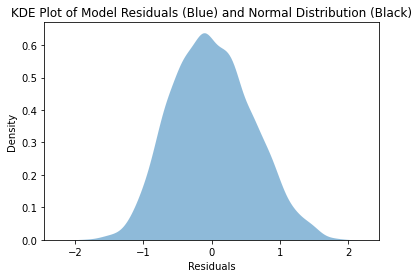

In [99]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [100]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             np.log(AbsolutError)
No. Observations:             6365                Method:                         REML                
No. Groups:                   19                  Scale:                          1.7438              
Min. group size:              329                 Log-Likelihood:                 -10849.9555         
Max. group size:              336                 Converged:                      Yes                 
Mean group size:              335.0                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


In [101]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           np.log(RT)
No. Observations:             6365              Method:                       REML      
No. Groups:                   19                Scale:                        0.2912    
Min. group size:              329               Log-Likelihood:               -5370.5016
Max. group size:              336               Converged:                    Yes       
Mean group size:              335.0                                                     
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      1.247    0.140  8.883 0.000  0.972  1.522
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [102]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        np.log(AbsolutError)
No. Observations:         6365           Method:                    REML                
No. Groups:               19             Scale:                     1.7438              
Min. group size:          329            Log-Likelihood:            -10756.6410         
Max. group size:          336            Converged:                 Yes                 
Mean group size:          335.0                                                         
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      3.293    0.317 10.382 0.000  2.671  3.914
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [103]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                                            Mixed Linear Model Regression Results
Model:                                            MixedLM                               Dependent Variable:                               np.log(AbsolutError)
No. Observations:                                 6365                                  Method:                                           REML                
No. Groups:                                       19                                    Scale:                                            1.7394              
Min. group size:                                  329                                   Log-Likelihood:                                   -10832.7233         
Max. group size:                                  336                                   Converged:                                        Yes                 
Mean group size:                                  335.0                                                    

In [104]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                                            Mixed Linear Model Regression Results
Model:                                              MixedLM                                   Dependent Variable:                                   np.log(RT)
No. Observations:                                   6365                                      Method:                                               REML      
No. Groups:                                         19                                        Scale:                                                0.4302    
Min. group size:                                    329                                       Log-Likelihood:                                       -6395.2428
Max. group size:                                    336                                       Converged:                                            Yes       
Mean group size:                                    335.0                                                  

In [105]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ avatarID + C(Context, Treatment(reference=False)) + avatarID:C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                              Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           np.log(AbsolutError)
No. Observations:             6365              Method:                       REML                
No. Groups:                   19                Scale:                        1.7328              
Min. group size:              329               Log-Likelihood:               -10826.2369         
Max. group size:              336               Converged:                    Yes                 
Mean group size:              335.0                                                               
--------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------
Intercept                                

In [106]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 6365    Method:             REML                
No. Groups:       19      Scale:              1.6464              
Min. group size:  329     Log-Likelihood:     -10689.1535         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.909    0.146 19.961 0.000  2.623  3.195
C(avatarID)[T.2.0]       0.526    0.167  3.153 0.002  0.199  0.852
C(avatarID)[T.3.0]       0.394    0.167  2.362 0.018  0.067  0.721
C(avatarID)[T.4.0]       0.153    0.164  0.935 0.350 -0.168  0.474
C(avatarID)[T.5.0]       0.093    0.164  0.571 0.568 -0.227  0.414
C(avatarID

In [107]:
# Absolut error predicted by FRS
formula = "np.log(AbsolutError) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 6365    Method:             REML                
No. Groups:       19      Scale:              1.7432              
Min. group size:  329     Log-Likelihood:     -10834.8518         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
--------------------------------------------------------------------
                Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
--------------------------------------------------------------------
Intercept        3.598      0.453    7.942   0.000    2.710    4.485
Global          -0.033      0.109   -0.306   0.759   -0.247    0.180
Overview         0.081      0.065    1.244   0.213   -0.047    0.209
Cardinal        -0.206      0.078   -2.658   0.008   -0.359   -0.054
Group Var        0.120      0.035                              

In [111]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 6365    Method:             REML      
No. Groups:       19      Scale:              0.4305    
Min. group size:  329     Log-Likelihood:     -6394.7494
Max. group size:  336     Converged:          Yes       
Mean group size:  335.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.717    0.373  4.605 0.000  0.986  2.448
Global         0.092    0.090  1.021 0.307 -0.084  0.268
Overview      -0.082    0.054 -1.531 0.126 -0.187  0.023
Cardinal      -0.004    0.064 -0.070 0.944 -0.130  0.121
Group Var      0.084    0.047                           



In [108]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ avatar_action_likert + avatar_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 6365    Method:             REML                
No. Groups:       19      Scale:              1.7432              
Min. group size:  329     Log-Likelihood:     -10840.2117         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                3.907    0.477  8.186 0.000  2.972  4.843
avatar_action_likert    -0.014    0.006 -2.164 0.030 -0.026 -0.001
avatar_standing_likert   0.010    0.008  1.388 0.165 -0.004  0.025
Group Var                0.144    0.040                           



In [109]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 6365    Method:             REML                
No. Groups:       19      Scale:              1.7432              
Min. group size:  329     Log-Likelihood:     -10835.4533         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            3.455     0.471   7.334  0.000   2.532   4.379
ContextQ_average    -0.050     0.115  -0.437  0.662  -0.276   0.176
Group Var            0.176     0.047                               



In [110]:
HumanAf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6365 entries, 0 to 6702
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       6365 non-null   int64  
 1   ID                               6365 non-null   float64
 2   Alter                            6365 non-null   float64
 3   Global                           6365 non-null   float64
 4   Overview                         6365 non-null   float64
 5   Cardinal                         6365 non-null   float64
 6   AffiliativeQ_average             6365 non-null   float64
 7   ContextQ_average                 6365 non-null   float64
 8   avatar_action_likert             6365 non-null   int64  
 9   avatar_standing_likert           6365 non-null   int64  
 10  AbsolutError                     6365 non-null   float64
 11  SignedAngle-+180                 6365 non-null   float64
 12  IQR                 